In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv

In [2]:
!ls

Main data base .ipynb
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
Untitled4.ipynb
Untitled5.ipynb
Untitled6.ipynb
Untitled7.ipynb
Untitled8.ipynb
bom.movie_gross.csv.gz
clean 8-21-22.ipynb
clean_master.parquet
im.db
im.db.zip
main data base 1.ipynb
notebook saved
recommend.ipynb
rt.movie_info.tsv.gz
rt_reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz
top 5 .ipynb


In [3]:
clean = pd.read_parquet(".\clean_master.parquet")


In [4]:
clean.head(10)

,RELEASE_DATE,TITLE,PRODUCTION_BUDGET,DOMESTIC_GROSS,WORLDWIDE_GROSS,PRODUCTION_BUDGET_USD,DOMESTIC_GROSS_USD,WORLDWIDE_GROSS_USD,FOREIGN_GROSS_USD,ROI_USD,GENRE,LEAD_ROLE,ACTOR_EARNINGS,FILM_DISTRIBUTORS
0,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306000000.0,936662225.0,2.053311e+09,1.116649e+09,5.710167,"Action, Adventure, Sci-Fi",Daisy Ridley,"$300,000",Walt Disney
1,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000.0,678815482.0,2.048134e+09,1.369319e+09,5.827114,"Action, Adventure, Sci-Fi",Robert Downey,"$10,000,000",Walt Disney
2,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209",300000000.0,229024295.0,6.559452e+08,4.269209e+08,1.186484,"Action, Adventure, Sci-Fi",Ben Affleck,"$10,000,000",Warner Bros
3,2015-11-06,Spectre,"$300,000,000","$200,074,175","$879,620,923",300000000.0,200074175.0,8.796209e+08,6.795467e+08,1.932070,Action Adventure Thriller,Daniel Craig,"$30,000,000",Sony Pictures
4,2018-05-25,Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",275000000.0,213767512.0,3.931513e+08,1.793838e+08,0.429641,Action Adventure Sci-Fi,Alden Ehrenreich,"$300,000",Walt Disney
5,2016-03-25,Batman v Superman: Dawn of Justice,"$250,000,000","$330,360,194","$867,500,281",250000000.0,330360194.0,8.675003e+08,5.371401e+08,2.470001,None,None,None,None
6,2017-05-26,Pirates of the Caribbean: Dead Men Tell No Tales,"$230,000,000","$172,558,876","$788,241,137",230000000.0,172558876.0,7.882411e+08,6.156823e+08,2.427135,None,None,None,None
7,2017-06-21,Transformers: The Last Knight,"$217,000,000","$130,168,683","$602,893,340",217000000.0,130168683.0,6.028933e+08,4.727247e+08,1.778310,None,None,None,None
8,2017-05-05,Guardians of the Galaxy Vol 2,"$200,000,000","$389,813,101","$862,316,233",200000000.0,389813101.0,8.623162e+08,4.725031e+08,3.311581,None,None,None,None
9,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,"$200,000,000","$159,555,901","$652,220,086",200000000.0,159555901.0,6.522201e+08,4.926642e+08,2.261100,None,None,None,None


In [5]:
#mean_production = clean['PRODUCTION_BUDGET_USD'].mean()
#[mean_production].value()

## financial visuals  using seasborn scatter plot 

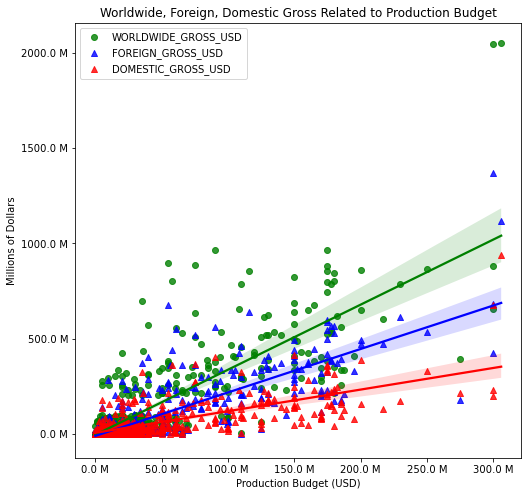

In [6]:
# set up figure convert to millions
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, ax = plt.subplots(figsize=(8,8), sharey=True)

# green dots/line will be domestic_gross as a function of production_budget
ax1 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='WORLDWIDE_GROSS_USD', color='green',marker='o', label='WORLDWIDE_GROSS_USD')

ax2 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='FOREIGN_GROSS_USD', color='blue',marker='^', label='FOREIGN_GROSS_USD')

# red dots/line will be domestic_gross as a function of production_budget
ax2 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='DOMESTIC_GROSS_USD', color='red',marker='^', label='DOMESTIC_GROSS_USD')



# include a legend
ax.legend()

# set title and axis labels
ax.set(title='Worldwide, Foreign, Domestic Gross Related to Production Budget',
      xlabel='Production Budget (USD)',
      ylabel = 'Millions of Dollars')

ax.xaxis.set_major_formatter(million_formatter)
ax.yaxis.set_major_formatter(million_formatter)




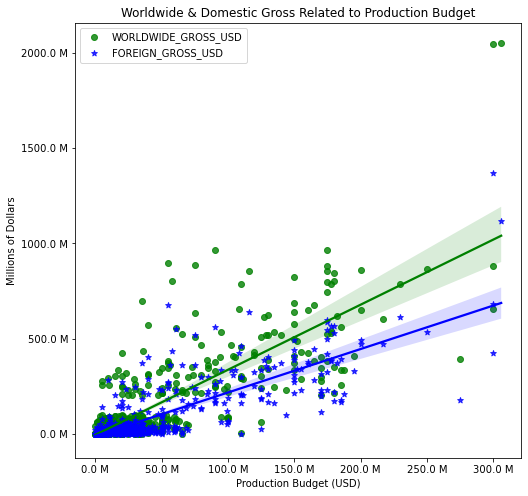

In [7]:
# set up figure convert to millions
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, ax = plt.subplots(figsize=(8,8), sharey=True)

# green dots/line will be domestic_gross as a function of production_budget
ax1 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='WORLDWIDE_GROSS_USD', color='green',marker='o', label='WORLDWIDE_GROSS_USD')

ax2 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='FOREIGN_GROSS_USD', color='blue', marker='*', label='FOREIGN_GROSS_USD')






# include a legend
ax.legend()

# set title and axis labels
ax.set(title='Worldwide & Domestic Gross Related to Production Budget',
      xlabel='Production Budget (USD)',
      ylabel = 'Millions of Dollars')

ax.xaxis.set_major_formatter(million_formatter)
ax.yaxis.set_major_formatter(million_formatter)


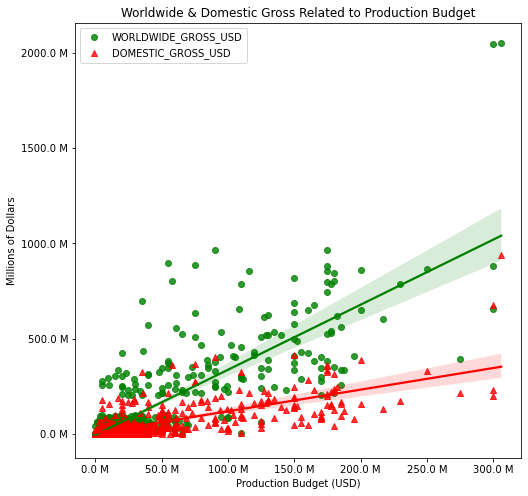

In [8]:
# set up figure convert to millions
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, ax = plt.subplots(figsize=(8,8), sharey=True)

# green dots/line will be domestic_gross as a function of production_budget
ax1 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='WORLDWIDE_GROSS_USD', color='green',marker='o', label='WORLDWIDE_GROSS_USD')


# red dots/line will be domestic_gross as a function of production_budget
ax2 = sns.regplot(data=clean, x='PRODUCTION_BUDGET_USD',
                 y='DOMESTIC_GROSS_USD', color='red',marker='^', label='DOMESTIC_GROSS_USD')




# include a legend
ax.legend()

# set title and axis labels
ax.set(title='Worldwide & Domestic Gross Related to Production Budget',
      xlabel='Production Budget (USD)',
      ylabel = 'Millions of Dollars')

ax.xaxis.set_major_formatter(million_formatter)
ax.yaxis.set_major_formatter(million_formatter)


In [9]:
clean.drop(clean.index[5:564],0,inplace=True)
clean.head(10)

C:\Users\stefano caruso\AppData\Local\Temp\ipykernel_16084\1430699267.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  clean.drop(clean.index[5:564],0,inplace=True)


,RELEASE_DATE,TITLE,PRODUCTION_BUDGET,DOMESTIC_GROSS,WORLDWIDE_GROSS,PRODUCTION_BUDGET_USD,DOMESTIC_GROSS_USD,WORLDWIDE_GROSS_USD,FOREIGN_GROSS_USD,ROI_USD,GENRE,LEAD_ROLE,ACTOR_EARNINGS,FILM_DISTRIBUTORS
0,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306000000.0,936662225.0,2.053311e+09,1.116649e+09,5.710167,"Action, Adventure, Sci-Fi",Daisy Ridley,"$300,000",Walt Disney
1,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000.0,678815482.0,2.048134e+09,1.369319e+09,5.827114,"Action, Adventure, Sci-Fi",Robert Downey,"$10,000,000",Walt Disney
2,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209",300000000.0,229024295.0,6.559452e+08,4.269209e+08,1.186484,"Action, Adventure, Sci-Fi",Ben Affleck,"$10,000,000",Warner Bros
3,2015-11-06,Spectre,"$300,000,000","$200,074,175","$879,620,923",300000000.0,200074175.0,8.796209e+08,6.795467e+08,1.932070,Action Adventure Thriller,Daniel Craig,"$30,000,000",Sony Pictures
4,2018-05-25,Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",275000000.0,213767512.0,3.931513e+08,1.793838e+08,0.429641,Action Adventure Sci-Fi,Alden Ehrenreich,"$300,000",Walt Disney


In [10]:
#import seaborn as sns
#sns.set_theme(style="whitegrid")



# Draw a nested barplot by species and sex
#3g = sns.catplot(
 #   data=clean, kind="bar",
  #  x="DOMESTIC_GROSS_USD", y="WORLDWIDE_GROSS_USD", hue="ROI_USD",
   # ci="sd", palette="dark", alpha=.6, height=6
#)
#g.despine(left=True)
#g.set_axis_labels("", "Body mass (g)")
#g.legend.set_title("")

In [11]:
#meanclean['PRODUCTION_BUDGET_USD'] / 1000000

In [12]:
#mean 
clean['DOMESTIC_GROSS_USD'] / 1000000

0    936.662225
1    678.815482
2    229.024295
3    200.074175
4    213.767512
Name: DOMESTIC_GROSS_USD, dtype: float64

In [13]:
# mean 
clean['WORLDWIDE_GROSS_USD'] / 1000000

0    2053.311220
1    2048.134200
2     655.945209
3     879.620923
4     393.151347
Name: WORLDWIDE_GROSS_USD, dtype: float64

In [14]:
#mean 
clean['FOREIGN_GROSS_USD'] / 1000000

0    1116.648995
1    1369.318718
2     426.920914
3     679.546748
4     179.383835
Name: FOREIGN_GROSS_USD, dtype: float64

In [15]:
# dollar amount of roi 
clean["PRODUCTION_BUDGET_USD"] * clean['ROI_USD']

0    1.747311e+09
1    1.748134e+09
2    3.559452e+08
3    5.796209e+08
4    1.181513e+08
dtype: float64

In [16]:
## financial visuals using Matplotlib bar charts 

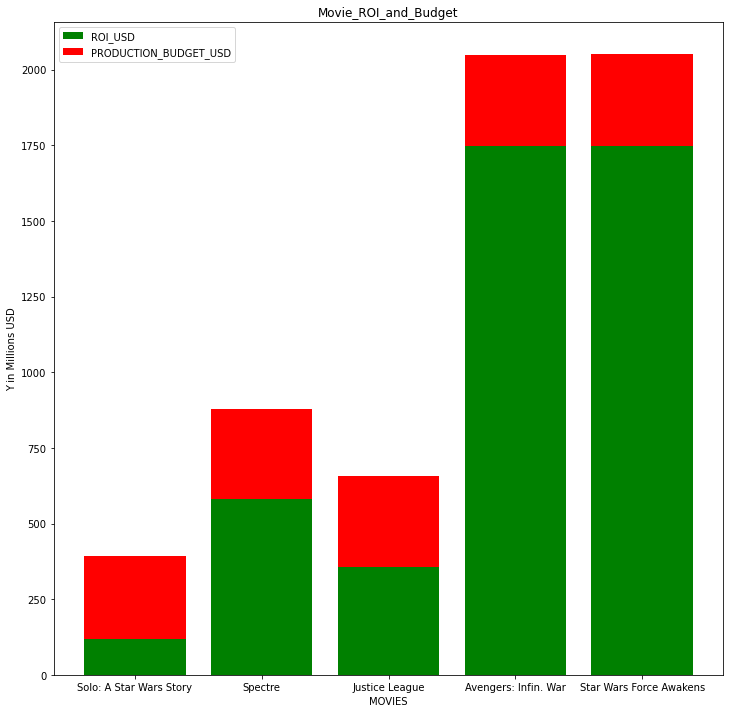

In [17]:
plt.figure(figsize=(12,12))
x = ["Solo: A Star Wars Story", "Spectre", "Justice League", "Avengers: Infin. War","Star Wars Force Awakens"]

ROI_USD = [118.1513, 579.6209, 355.9452, 1748.134, 1747.311] 
PRODUCTION_BUDGET_USD = [275., 300., 300., 300., 306.] 


plt.bar(x,ROI_USD, color = 'g', label="ROI_USD")
plt.bar(x,PRODUCTION_BUDGET_USD,bottom=ROI_USD, color = 'r', label="PRODUCTION_BUDGET_USD")


    
plt.xlabel("MOVIES")
plt.ylabel("Y in Millions USD")
plt.title("Movie_ROI_and_Budget")
plt.legend(loc="upper left")





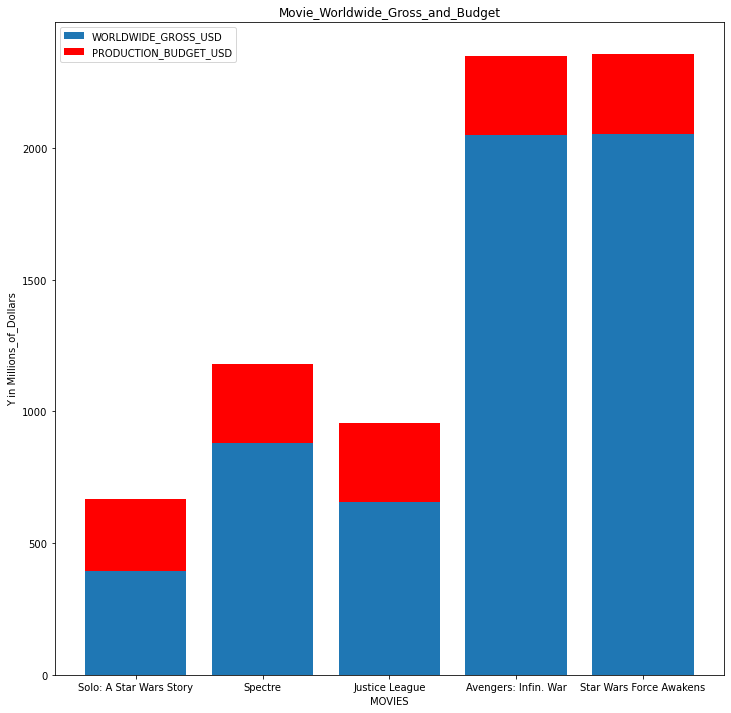

In [18]:

plt.figure(figsize=(12,12))
x = ["Solo: A Star Wars Story", "Spectre", "Justice League", "Avengers: Infin. War","Star Wars Force Awakens"]

WORLDWIDE_GROSS_USD = [393.1513, 879.6209, 655.9452, 2048.1342, 2053.3112] 
PRODUCTION_BUDGET_USD = [275., 300., 300., 300., 306.] 


plt.bar(x,WORLDWIDE_GROSS_USD,label="WORLDWIDE_GROSS_USD")
plt.bar(x,PRODUCTION_BUDGET_USD,bottom=WORLDWIDE_GROSS_USD, color = 'r', label="PRODUCTION_BUDGET_USD")


    
plt.xlabel("MOVIES")
plt.ylabel("Y in Millions_of_Dollars")
plt.title("Movie_Worldwide_Gross_and_Budget")
plt.legend(loc="upper left")



Text(0.5, 1.0, 'DOMESTIC_GROSS_and_"FOREIGN_GROSS_COMPARSION')

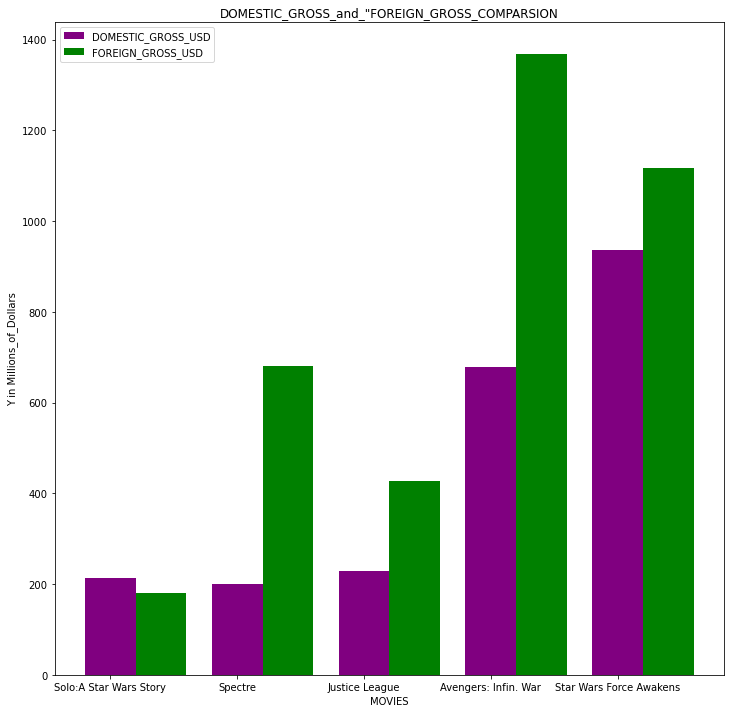

In [19]:
plt.figure(figsize=(12,12))



w=0.4
x = ["Solo:A Star Wars Story", "Spectre", "Justice League", "Avengers: Infin. War","Star Wars Force Awakens"]
DOMESTIC_GROSS_USD =  [213.7675, 200.0742, 229.0243, 678.8155, 936.6622, ]
FOREIGN_GROSS_USD =  [179.3838, 679.5467, 426.9209, 1369.3187, 1116.6490 ]

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1,DOMESTIC_GROSS_USD,w, color = 'purple', label="DOMESTIC_GROSS_USD")
plt.bar(bar2,FOREIGN_GROSS_USD,w, color = 'g', label="FOREIGN_GROSS_USD")

plt.xticks(bar1,x)
plt.legend()
plt.xlabel("MOVIES")
plt.ylabel("Y in Millions_of_Dollars")
plt.title("DOMESTIC_GROSS"'_and_"'"FOREIGN_GROSS""_COMPARSION")

Text(0.5, 1.0, 'Movie_worldwide_gross_and_budget')

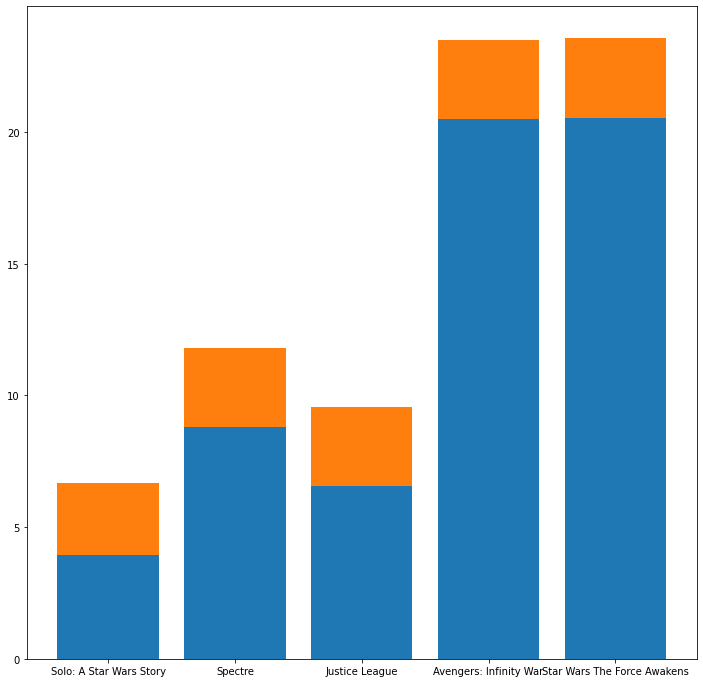

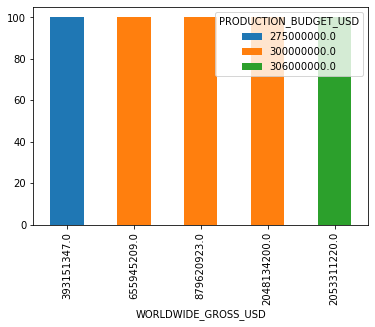

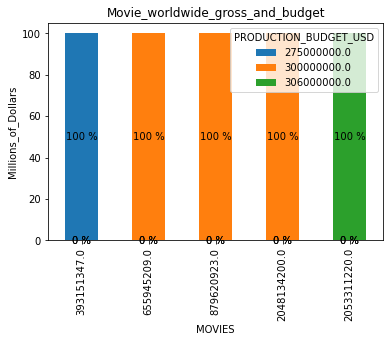

In [20]:

plt.figure(figsize=(12,12))
x = ["Solo: A Star Wars Story", "Spectre", "Justice League", "Avengers: Infinity War","Star Wars The Force Awakens"]

WORLDWIDE_GROSS_USD = [3.931513, 8.796209, 6.559452, 20.481342, 20.533112] 
PRODUCTION_BUDGET_USD = [2.75, 3.00, 3.00, 3.00, 3.06] 


plt.bar(x,WORLDWIDE_GROSS_USD,label="WORLDWIDE_GROSS_USD")
plt.bar(x,PRODUCTION_BUDGET_USD,bottom=WORLDWIDE_GROSS_USD,label="PRODUCTION_BUDGET_USD")

counter = clean.groupby('WORLDWIDE_GROSS_USD')['PRODUCTION_BUDGET_USD'].value_counts().unstack()
percentage_dist = 100 * counter.divide(counter.sum(axis = 1), axis = 0)
percentage_dist.plot.bar(stacked=True)
ax = percentage_dist.plot.bar(stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
    
plt.xlabel("MOVIES")
plt.ylabel("Millions_of_Dollars")
plt.title("Movie_worldwide_gross_and_budget")

